# **Machine Learning Lab - Final Project (Behind the Scenes)**



*Pokemon Dataset* -  -> found here: https://www.kaggle.com/alopez247/pokemon?select=pokemon_alopez247.csv

*Description* - 721 rows x 23 columns

# Question: 
***Can we predict what generation a pokemon is from, given the rest of it's attributes?***

## ***Flow***:

> 1. Import Data & Libraries
> 2. Exploratory Data Analysis
> 3. Train/Test Split
> 4. Prepare for ML
> 5. Pick Models
> 6. Model Selection
> 7. Model Tuning
> 8. Pick Best Model

## ***Import Data and Libraries***

In [3]:
reset -fs

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection        import train_test_split, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.impute                 import SimpleImputer
from sklearn.preprocessing          import StandardScaler, OneHotEncoder
from sklearn.compose                import ColumnTransformer
from sklearn.pipeline               import Pipeline
from sklearn.linear_model           import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.neighbors              import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble               import RandomForestClassifier, ExtraTreesClassifier, IsolationForest
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.metrics                import f1_score
from sklearn.base                   import BaseEstimator
from sklearn.decomposition          import PCA
from sklearn.cluster                import KMeans
from sklearn.cluster                import SpectralClustering
from sklearn                        import metrics
from scipy.spatial.distance         import cdist
from sklearn.metrics                import accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.drop_duplicates()

y = pokemon_df['Generation']
X = pokemon_df.drop('Generation', axis=1)

## ***Exloratory Data Analysis***

### **Drop Duplicates**

In [ ]:
pokemon_df.drop_duplicates()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


### **Initial Clean**

In [ ]:
# Get Rid of columns that will not aid classification
X = X.drop(['hasMegaEvolution', 'hasGender', 'Pr_Male','isLegendary'], axis= 1)


### **Separate Data Types**

In [ ]:
numerical_df = X.select_dtypes(['int', 'float'])
numerical_df

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate
0,1,318,45,49,49,65,65,45,0.71,6.9,45
1,2,405,60,62,63,80,80,60,0.99,13.0,45
2,3,525,80,82,83,100,100,80,2.01,100.0,45
3,4,309,39,52,43,60,50,65,0.61,8.5,45
4,5,405,58,64,58,80,65,80,1.09,19.0,45
...,...,...,...,...,...,...,...,...,...,...,...
716,717,680,126,131,95,131,98,99,5.79,203.0,45
717,718,600,108,100,121,81,95,95,5.00,305.0,3
718,719,600,50,100,150,100,150,50,0.71,8.8,3
719,720,600,80,110,60,150,130,70,0.51,9.0,3


In [ ]:
categorical_df =  X.select_dtypes(['object'])
categorical_df

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
0,Bulbasaur,Grass,Poison,Green,Monster,Grass,quadruped
1,Ivysaur,Grass,Poison,Green,Monster,Grass,quadruped
2,Venusaur,Grass,Poison,Green,Monster,Grass,quadruped
3,Charmander,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
4,Charmeleon,Fire,NaN,Red,Monster,Dragon,bipedal_tailed
...,...,...,...,...,...,...,...
716,Yveltal,Dark,Flying,Red,Undiscovered,NaN,two_wings
717,Zygarde,Dragon,Ground,Green,Undiscovered,NaN,serpentine_body
718,Diancie,Rock,Fairy,Pink,Undiscovered,NaN,head_arms
719,Hoopa,Psychic,Ghost,Purple,Undiscovered,NaN,head_only


In [ ]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

### **Visualize**

> #### *General*




In [ ]:
X.value_counts()

Number  Name       Type_1    Type_2   Total  HP  Attack  Defense  Sp_Atk  Sp_Def  Speed  Color  Egg_Group_1  Egg_Group_2  Height_m  Weight_kg  Catch_Rate  Body_Style    
1       Bulbasaur  Grass     Poison   318    45  49      49       65      65      45     Green  Monster      Grass        0.71      6.9        45          quadruped         1
448     Lucario    Fighting  Steel    525    70  110     70       115     70      90     Blue   Field        Human-Like   1.19      54.0       45          bipedal_tailed    1
546     Cottonee   Grass     Fairy    280    40  27      60       37      50      66     Green  Grass        Fairy        0.30      0.6        190         head_only         1
528     Swoobat    Psychic   Flying   425    67  57      55       77      55      114    Blue   Field        Flying       0.89      10.5       45          two_wings         1
527     Woobat     Psychic   Flying   313    55  45      43       55      43      72     Blue   Field        Flying       0.41    



> #### *Numerical*



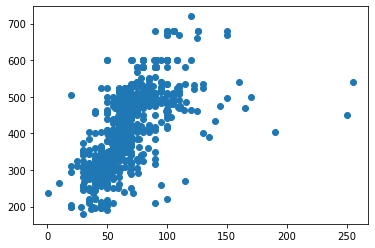

In [ ]:
plt.scatter(numerical_df.HP, numerical_df.Total )

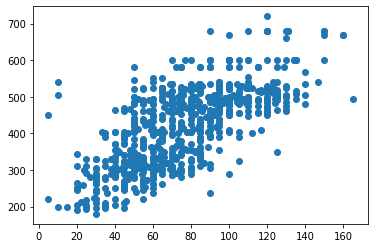

In [ ]:
plt.scatter(numerical_df.Attack, numerical_df.Total )

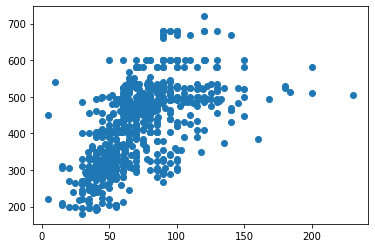

In [ ]:
plt.scatter(numerical_df.Defense, numerical_df.Total )

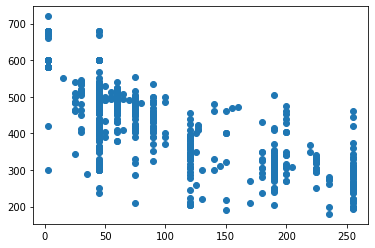

In [ ]:
plt.scatter(numerical_df.Catch_Rate, numerical_df.Total )



> #### Categorical



<AxesSubplot:>

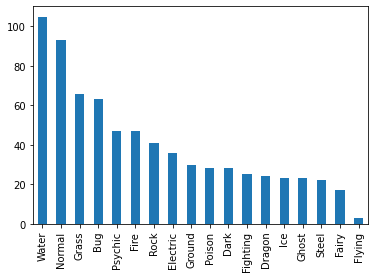

In [ ]:
categorical_df[cols[1]].value_counts().plot(kind='bar')

<AxesSubplot:>

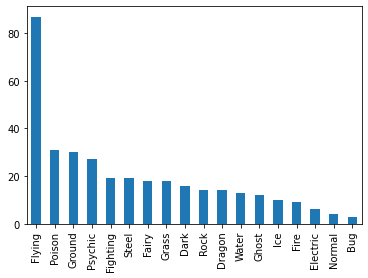

In [ ]:
categorical_df[cols[2]].value_counts().plot(kind='bar')

<AxesSubplot:>

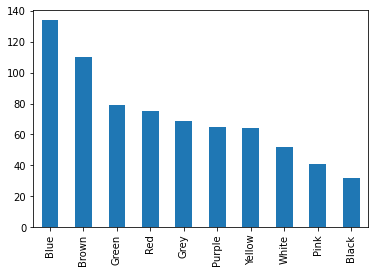

In [ ]:
categorical_df[cols[3]].value_counts().plot(kind='bar')

### **Assess Missing Values**

In [ ]:
X.isna().any()

Type_1         False
Type_2          True
Total          False
HP             False
Attack         False
Defense        False
Sp_Atk         False
Sp_Def         False
Speed          False
Color          False
Egg_Group_1    False
Egg_Group_2     True
Height_m       False
Weight_kg      False
Catch_Rate     False
Body_Style     False
dtype: bool

In [ ]:
# Given that the missing values- imputing "None" would make the most sense
categorical_df.Type_2.isna

<bound method Series.isna of 0      Poison
1      Poison
2      Poison
3         NaN
4         NaN
        ...  
716    Flying
717    Ground
718     Fairy
719     Ghost
720     Water
Name: Type_2, Length: 721, dtype: object>

In [ ]:
categorical_df.Egg_Group_2.isna

<bound method Series.isna of 0       Grass
1       Grass
2       Grass
3      Dragon
4      Dragon
        ...  
716       NaN
717       NaN
718       NaN
719       NaN
720       NaN
Name: Egg_Group_2, Length: 721, dtype: object>

## ***Split Data*** 
> ##### 75/25 split



In [6]:
X

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_validation, y_train_2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### **Transform/Prepare for ML**

In [22]:
num_columns = ['Number','Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Catch_Rate']
cat_columns = ['Name','Type_1', 'Type_2', 'Color', 'Egg_Group_1', 'Egg_Group_2', 'Body_Style']

In [23]:
cat_pipe = Pipeline([ ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                      ('ohe', OneHotEncoder(handle_unknown='ignore'))])

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                      ('scaler', StandardScaler())])

preprocessing = ColumnTransformer([('categorical', cat_pipe,  cat_columns),
                                   ('numerical',  num_pipe, num_columns)])


### **Try Models**

In [25]:
algorithms = algos = [RandomForestClassifier(),
             ExtraTreesClassifier(),
             IsolationForest(),
             LogisticRegression(),
             PassiveAggressiveClassifier(),
             RidgeClassifier(),
             SGDClassifier(),
             DecisionTreeClassifier()]

results = dict()

for algo in algorithms:
    pipe = Pipeline([('preprocessing', preprocessing), 
                     ('clf', algo)])

    pipe.fit(X_train_2, y_train_2)
    y_pred = pipe.predict(X_validation)
    f1_test  = f1_score(y_validation, y_pred, average='weighted')
    accuracy = accuracy_score(y_validation, y_pred)
    print(f"{algo.__class__.__name__:<17} - f1_score: {f1_test:,.2f}")
    print(f"{algo.__class__.__name__:<17} - accuracy: {accuracy:,.2f}\n")

RandomForestClassifier - f1_score: 0.82
RandomForestClassifier - accuracy: 0.84

ExtraTreesClassifier - f1_score: 0.69
ExtraTreesClassifier - accuracy: 0.72

IsolationForest   - f1_score: 0.10
IsolationForest   - accuracy: 0.25

LogisticRegression - f1_score: 0.65
LogisticRegression - accuracy: 0.67

PassiveAggressiveClassifier - f1_score: 0.62
PassiveAggressiveClassifier - accuracy: 0.64

RidgeClassifier   - f1_score: 0.50
RidgeClassifier   - accuracy: 0.53

SGDClassifier     - f1_score: 0.57
SGDClassifier     - accuracy: 0.59

DecisionTreeClassifier - f1_score: 1.00
DecisionTreeClassifier - accuracy: 1.00



In [ ]:
# Random Search and CV to tune hyperparameters

In [ ]:
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

pipe = Pipeline([('preprocessing', preprocessing), 
                 ('clf', DummyEstimator())])

### **Select Models**

In [ ]:
search_space = [{'clf': [LogisticRegression()], 
                 'clf__penalty': ['l1', 'l2'],
                 'clf__C': np.logspace(0, 4, 10),
                 'clf__multi_class' : ['auto', 'multinomial', 'ovr'],
                 'clf__solver' : ['newton-cg', 'lbfgs'],
                 'clf__class_weight' : ['balanced', None]},
                
                {'clf': [RandomForestClassifier()],
                'clf__bootstrap': [False,True],
                'clf__class_weight': [None, 'balanced'],
                'clf__criterion': ['gini', 'entropy'],
                'clf__max_depth': [50, 100, 150, 200, 500],
                'clf__max_features': ['auto','sqrt', 'log2'],
                'clf__min_samples_leaf': [1,2,3],
                'clf__min_weight_fraction_leaf': [0.0, 0.1],
                'clf__n_estimators': [10,100,500]},
                
                {'clf': [ExtraTreesClassifier()],
                'clf__bootstrap': [False,True],
                'clf__class_weight': [None, 'balanced'],
                'clf__criterion': ['gini', 'entropy'],
                'clf__max_depth': [50, 100, 150, 200, 500],
                'clf__max_features': ['auto','sqrt', 'log2'],
                'clf__min_samples_leaf': [1,2,3],
                'clf__min_weight_fraction_leaf': [0.0, 0.1],
                'clf__n_estimators': [10,100,500]},

                {'clf': [PassiveAggressiveClassifier()],
                'clf__max_iter': [100, 500, 1000, 1500],
                'clf__early_stopping': [False,True],
                'clf__shuffle': [False,True],
                'clf__warm_start': [False,True]}]

In [ ]:
clf_algos_rand = RandomizedSearchCV(estimator=pipe, 
                                    param_distributions=search_space, 
                                    n_iter=50,
                                    cv=5, 
                                    n_jobs=-1,
                                    verbose=1)

### **Final Model Selection**

In [ ]:
# Fit search
best_model = clf_algos_rand.fit(X_train_2, y_train_2);

# View best model
best_model.best_estimator_.get_params()['clf']


Fitting 5 folds for each of 50 candidates, totalling 250 fits


LogisticRegression(C=166.81005372000593)

In [26]:
pipe = Pipeline([('preprocessing', preprocessing),
                ('lr', LogisticRegression(C=464.15888336127773, class_weight='balanced', multi_class='multinomial', solver='newton-cg'))])

In [27]:
cv_acc_score = cross_val_score(pipe, X_train, y_train, cv=20,scoring='f1_weighted')
print("Mean 20-Fold accuracy: {}".format(np.mean(cv_acc_score)))
cv_acc_score = cross_val_score(pipe, X_train, y_train, cv=25,scoring='accuracy')
print("Mean 20-Fold accuracy: {}".format(np.mean(cv_acc_score)))

Mean 20-Fold accuracy: 0.8108512033138953
Mean 20-Fold accuracy: 0.8021014492753623


In [ ]:
# Taken from: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(numerical_df)
    kmeanModel.fit(numerical_df)
 
    distortions.append(sum(np.min(cdist(numerical_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / numerical_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(numerical_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / numerical_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 153.41439064133593
2 : 108.44172902326667
3 : 95.49301436102219
4 : 84.37591847560721
5 : 81.60319487431507
6 : 78.08273104682611
7 : 75.42972345408172
8 : 73.35230276392481
9 : 70.26015037987013
10 : 68.63244712567554
11 : 66.72454188728305
12 : 64.49816896729145
13 : 63.31760292822816
14 : 62.56704574905595


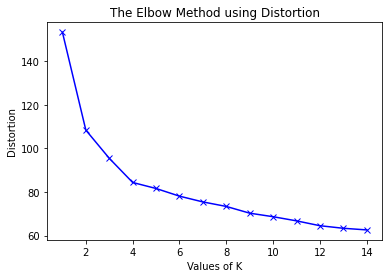

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 21958534.257150874
2 : 11759198.694452198
3 : 8109483.077955097
4 : 6504524.858375606
5 : 5724724.969864852
6 : 5308623.185137389
7 : 4904906.385312851
8 : 4553081.486674106
9 : 4230387.543557403
10 : 3963234.216194416
11 : 3783211.08466203
12 : 3581027.557811929
13 : 3414305.4893134483
14 : 3294007.2217609053


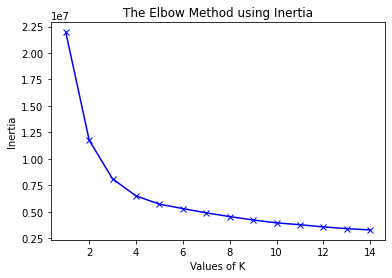

In [ ]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [36]:
pipe = Pipeline([('preprocessing', preprocessing),
                ('k-mean', KMeans(n_clusters=12)),
                ('clm',  LogisticRegression(C=464.15888336127773, class_weight='balanced', multi_class='multinomial', solver='newton-cg'))])

In [29]:
cv_f1_score = cross_val_score(pipe, X_train, y_train, cv=20,scoring='f1_weighted')
print("Mean 20-Fold accuracy: {}".format(np.mean(cv_f1_score)))

Mean 20-Fold accuracy: 0.8820037789249611


### Test

In [41]:
pipe = Pipeline([('preprocessing', preprocessing),
                ('k-mean', KMeans(n_clusters=12)),
                ('clm',  LogisticRegression(C=464.15888336127773, class_weight='balanced', multi_class='multinomial', solver='newton-cg'))])

In [44]:
cv_f1_score = cross_val_score(pipe, X_test, y_test, cv=10,scoring='f1_weighted')
print("Mean 20-Fold f1_score: {}".format(np.mean(cv_f1_score)))
cv_acc_score = cross_val_score(pipe, X_test, y_test, cv=10,scoring='accuracy')
print("Mean 20-Fold accuracy: {}".format(np.mean(cv_acc_score)))

Mean 20-Fold f1_score: 0.7475403485403485
Mean 20-Fold accuracy: 0.7583076923076922


# Conclusion


Conclusion: While the results appeared promising while using the training sets- in the end, the metrics on the test set, which are what is truly important, tells a different story. From baseline model of ~ 0.67 accuracy to ~ 0.747, the tuning and clustering were unsuccessful in creating a "good" model in this particular case.

Going forward: Additional clustering techniques (and assessing via their evaluation metrics) may be a feasible and worthwhile option to explore. Additionally, performing some feature importance/PCA might allow for a simplification of the model (though it is not particularly "complex"). Less features allow for better interpretability.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ccb00087-ba61-4db1-ba97-3a0ee74eb21a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>